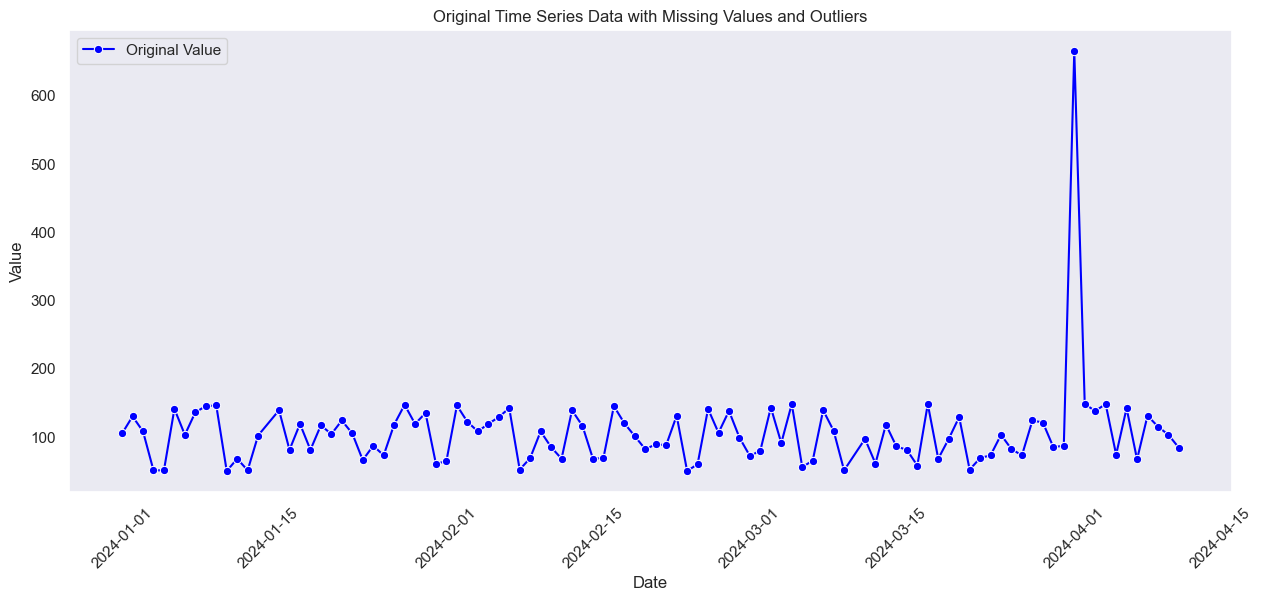

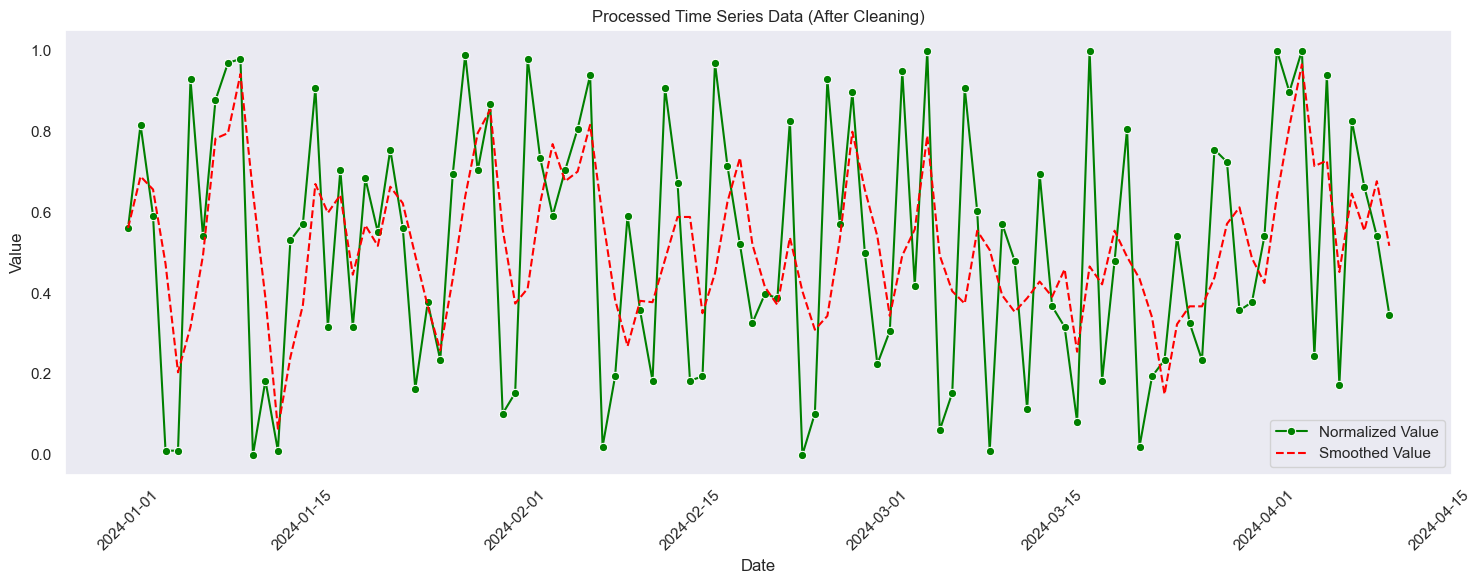

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seed for reproducibility
#np.random.seed(42)
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Generate random time series data (10-20 samples)
n_samples = np.random.randint(100, 110)
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='D')
data = np.random.randint(50, 150, size=n_samples).astype(float)

# Introduce some missing values and outliers (fixed randomness)
indices_with_nan = np.random.choice(n_samples, size=2, replace=False)
data[indices_with_nan] = np.nan  # Missing values

# Introduce an outlier
outlier_index = np.random.randint(0, n_samples)
data[outlier_index] *= 5  # Outlier

# Create the DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})



# Plot the original data
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Value', data=df, marker='o', label='Original Value', color='blue')
plt.title('Original Time Series Data with Missing Values and Outliers')
plt.xticks(rotation=45)
plt.grid()

# Replace any infinite values with NaN to avoid future warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handling Missing Values (Fill with mean value)
df['Value'].fillna(df['Value'].mean(), inplace=True)

# Handling Outliers (Capping at 99th percentile)
upper_limit = df['Value'].quantile(0.99)
df['Value'] = np.where(df['Value'] > upper_limit, df['Value'].median(), df['Value'])

# Normalization (Min-Max Scaling)
df['Value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())

# Moving Average Smoothing (Window = 3)
df['Smoothed_Value'] = df['Value'].rolling(window=3, min_periods=1).mean()

# Plot the cleaned data using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Value', data=df, marker='o', label='Normalized Value', color='green')
sns.lineplot(x='Date', y='Smoothed_Value', data=df, linestyle='dashed', label='Smoothed Value', color='red')
plt.title('Processed Time Series Data (After Cleaning)')
plt.xticks(rotation=45)
plt.grid()

# Display the plots side by side
plt.tight_layout()
plt.show()


Cleaned and Processed Time Series Data:
         Date     Value  Smoothed_Value
0  2024-01-01  0.989362        0.989362
1  2024-01-02  0.648936        0.819149
2  2024-01-03  0.287234        0.641844
3  2024-01-04  0.872340        0.699468
4  2024-01-05  0.617021        0.682979
5  2024-01-06  0.861702        0.657447
6  2024-01-07  0.489362        0.625532
7  2024-01-08  0.212766        0.610638
8  2024-01-09  0.563830        0.548936
9  2024-01-10  0.617021        0.548936
10 2024-01-11  0.694149        0.515426
11 2024-01-12  0.180851        0.453723
12 2024-01-13  0.563830        0.523936
13 2024-01-14  0.694149        0.550000
14 2024-01-15  0.861702        0.598936
15 2024-01-16  0.468085        0.553723
16 2024-01-17  0.500000        0.617553
17 2024-01-18  0.393617        0.583511
18 2024-01-19  0.691489        0.582979
19 2024-01-20  0.106383        0.431915
20 2024-01-21  0.521277        0.442553
21 2024-01-22  0.585106        0.459574
22 2024-01-23  0.978723        0.576596

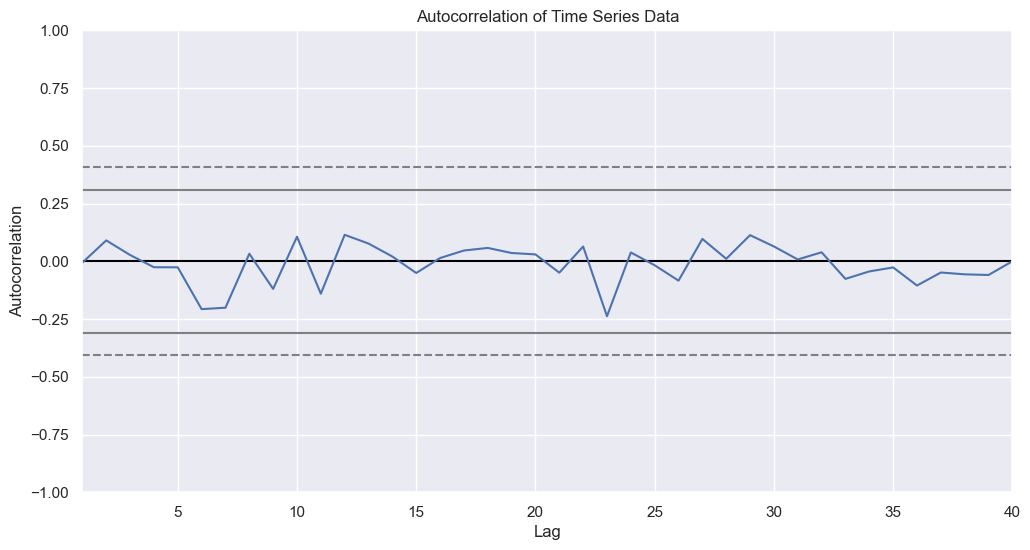

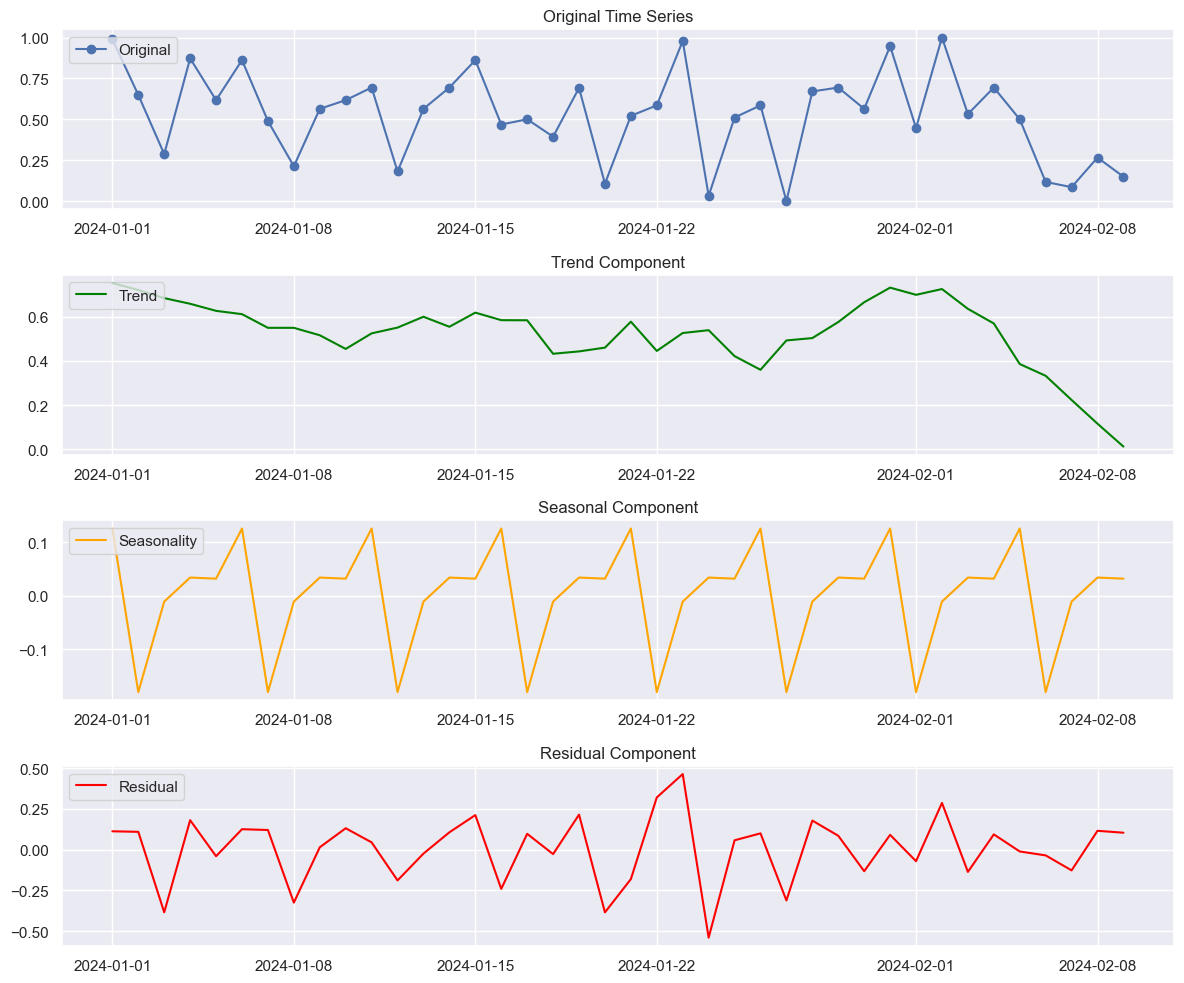


Time Series Decomposition:


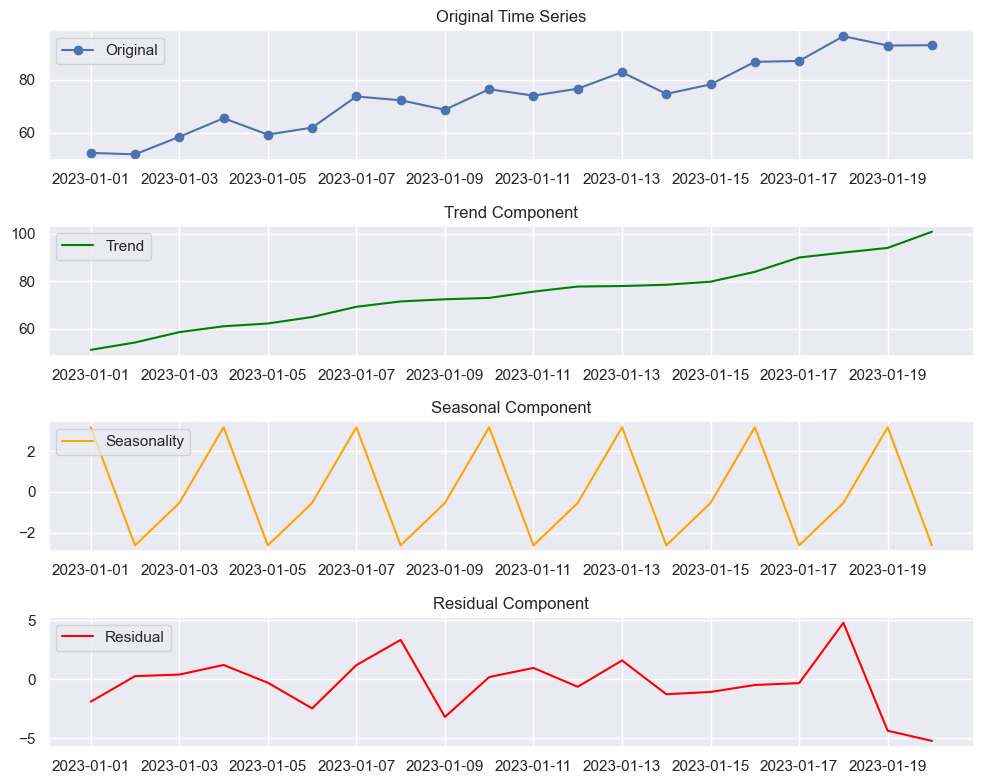


ADF Test on Original Series:
ADF Statistic: 0.05480394617791605
p-value: 0.9628363921597566
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
The series is non-stationary.

Autocorrelation Plot:


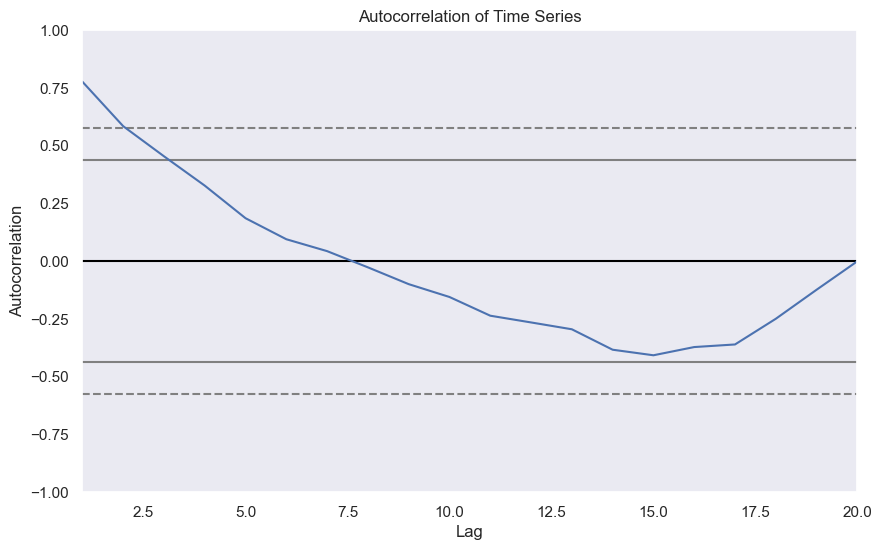


ADF Test on Differenced Series:
ADF Statistic: -3.430615466609437
p-value: 0.009958429295541266
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
The series is stationary.

Autocorrelation Plot for Differenced Series:


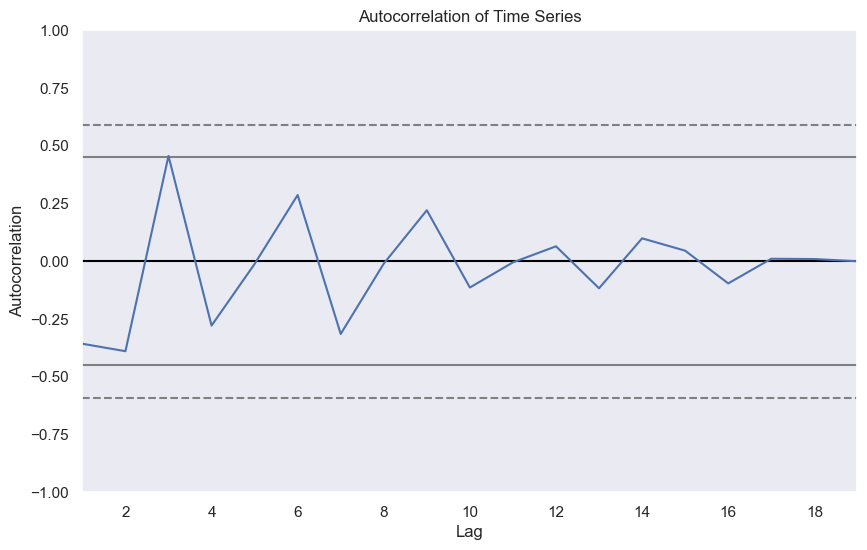